Customer Churn Prediction: Built an end-to-end machine learning model using Python and SQL to identify high-risk customers, optimize recall, and support proactive retention decisions, with insights visualized in Power BI.

In [3]:
import pandas as pd #importing pandas library
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
tc = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
tc.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
tc.shape  #checking the dataset
tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
tc.isnull().sum() #finding null values

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [6]:
tc['Churn'].value_counts() #analyzing the churn values

,count
Churn,
No,5174
Yes,1869


DATA CLEANING AND FEAUTURE PREPARATION

In [7]:
tc['TotalCharges'].dtype #cleaning


dtype('O')

In [8]:
# Convert TotalCharges to numeric
tc['TotalCharges'] = pd.to_numeric(tc['TotalCharges'], errors='coerce')

# Check missing values after conversion
tc['TotalCharges'].isnull().sum()


np.int64(11)

In [9]:
#Drop rows with missing TotalCharges
tc = tc.dropna()
#Verify missing values
tc.isnull().sum().sum()

np.int64(0)

In [10]:
# Convert Churn to binary
tc['Churn'] = tc['Churn'].map({'Yes': 1, 'No': 0})
tc['Churn'].value_counts()

,count
Churn,
0,5163
1,1869


In [11]:
# Create tenure groups
tc['tenure_group'] = pd.cut(
    tc['tenure'],
    bins=[0, 12, 24, 48, 60, 72],
    labels=['0-12', '13-24', '25-48', '49-60', '61+']
)

tc[['tenure', 'tenure_group']].head()


,tenure,tenure_group
0,1,0-12
1,34,25-48
2,2,0-12
3,45,25-48
4,2,0-12


In [12]:
tc=tc.drop(columns=['customerID'])

In [13]:
# One-hot encode categorical features
tc_encoded = pd.get_dummies(tc, drop_first=True)
tc_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_13-24,tenure_group_25-48,tenure_group_49-60,tenure_group_61+
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,True,False,True,False,False,False,False,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,True,False,False,False,False,True,False,True,False,False
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,True,False,False,True,False,False,False,False
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,True,False,False,False,False,False,False,True,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,True,False,True,False,False,False,False,False


In [14]:
X = tc_encoded.drop('Churn', axis=1)
y = tc_encoded['Churn']
X.shape, y.shape


((7032, 34), (7032,))

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)
X_train.shape, X_test.shape

((5274, 34), (1758, 34))

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [17]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [18]:
# Logistic Regression predictions
log_preds = log_model.predict(X_test)
log_probs = log_model.predict_proba(X_test)[:, 1]

# Random Forest predictions
rf_preds = rf_model.predict(X_test)
rf_probs = rf_model.predict_proba(X_test)[:, 1]

In [19]:
def evaluate_model(y_true, preds, probs):
    return {
        'Accuracy': accuracy_score(y_true, preds),
        'Precision': precision_score(y_true, preds),
        'Recall': recall_score(y_true, preds),
        'ROC_AUC': roc_auc_score(y_true, probs)
    }
log_metrics = evaluate_model(y_test, log_preds, log_probs)
rf_metrics = evaluate_model(y_test, rf_preds, rf_probs)
log_metrics, rf_metrics

({'Accuracy': 0.7952218430034129,
  'Precision': 0.6404199475065617,
  'Recall': 0.5224839400428265,
  'ROC_AUC': np.float64(0.8397462584819628)},
 {'Accuracy': 0.7849829351535836,
  'Precision': 0.6193029490616622,
  'Recall': 0.49464668094218417,
  'ROC_AUC': np.float64(0.820927952867571)})

In [20]:
log_cm = confusion_matrix(y_test, log_preds)
rf_cm = confusion_matrix(y_test, rf_preds)
log_cm, rf_cm

(array([[1154,  137],
        [ 223,  244]]),
 array([[1149,  142],
        [ 236,  231]]))

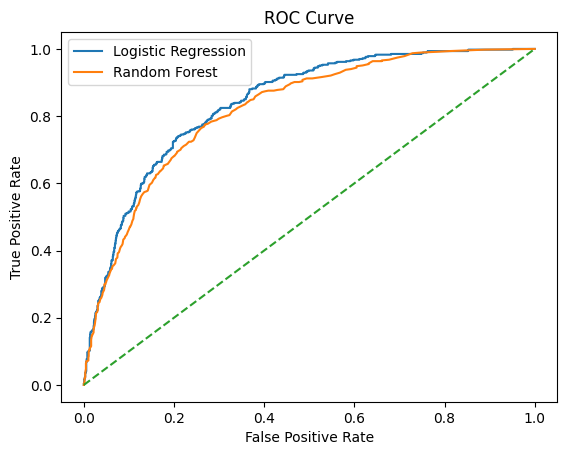

In [21]:
fpr_log, tpr_log, _ = roc_curve(y_test, log_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
plt.figure()
plt.plot(fpr_log, tpr_log, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [22]:
print("Logistic Regression ROC-AUC:", roc_auc_score(y_test, log_probs))
print("Random Forest ROC-AUC:", roc_auc_score(y_test, rf_probs))

Logistic Regression ROC-AUC: 0.8397462584819628
Random Forest ROC-AUC: 0.820927952867571


In [23]:
thresholds = np.arange(0.1, 0.9, 0.05)

for t in thresholds:
    preds = (rf_probs >= t).astype(int)
    print(
        f"Threshold: {round(t,2)} | "
        f"Precision: {precision_score(y_test, preds):.2f} | "
        f"Recall: {recall_score(y_test, preds):.2f}"
    )

Threshold: 0.1 | Precision: 0.38 | Recall: 0.92
Threshold: 0.15 | Precision: 0.42 | Recall: 0.89
Threshold: 0.2 | Precision: 0.45 | Recall: 0.85
Threshold: 0.25 | Precision: 0.48 | Recall: 0.80
Threshold: 0.3 | Precision: 0.52 | Recall: 0.75
Threshold: 0.35 | Precision: 0.55 | Recall: 0.68
Threshold: 0.4 | Precision: 0.58 | Recall: 0.62
Threshold: 0.45 | Precision: 0.62 | Recall: 0.55
Threshold: 0.5 | Precision: 0.62 | Recall: 0.49
Threshold: 0.55 | Precision: 0.64 | Recall: 0.43
Threshold: 0.6 | Precision: 0.65 | Recall: 0.37
Threshold: 0.65 | Precision: 0.69 | Recall: 0.32
Threshold: 0.7 | Precision: 0.71 | Recall: 0.26
Threshold: 0.75 | Precision: 0.73 | Recall: 0.22
Threshold: 0.8 | Precision: 0.73 | Recall: 0.15
Threshold: 0.85 | Precision: 0.75 | Recall: 0.11


In [24]:
final_threshold = 0.40  # adjust based on results

final_preds = (rf_probs >= final_threshold).astype(int)

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, final_preds))
print(confusion_matrix(y_test, final_preds))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1291
           1       0.59      0.63      0.60       467

    accuracy                           0.78      1758
   macro avg       0.72      0.73      0.73      1758
weighted avg       0.79      0.78      0.78      1758

[[1084  207]
 [ 175  292]]


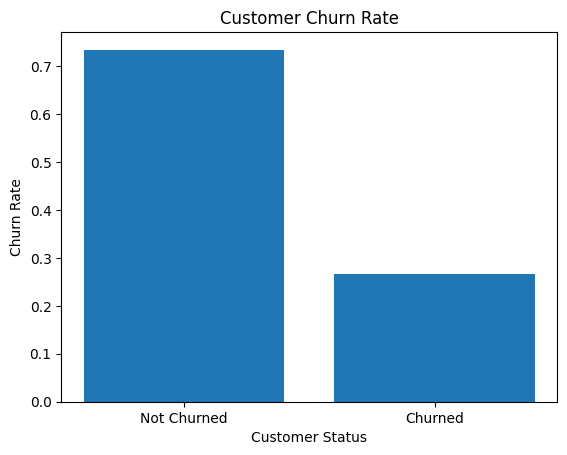

In [25]:
# Calculate churn counts
churn_counts = y.value_counts().sort_index()
# Calculate churn rate
churn_rate = churn_counts / churn_counts.sum()
# Plot
plt.figure()
plt.bar(['Not Churned', 'Churned'], churn_rate)
plt.xlabel('Customer Status')
plt.ylabel('Churn Rate')
plt.title('Customer Churn Rate')
plt.show()


This visualization shows the proportion of customers who churned versus those who remained. The imbalance indicates that churned customers represent a smaller share of the population, which makes accuracy alone misleading. As a result, the modeling approach prioritizes recall to minimize missed churn customers and support proactive retention strategies.

In [26]:
feature_importance = pd.DataFrame({
    "feature": X.columns,
    "importance": rf_model.feature_importances_
}).sort_values("importance", ascending=False)

feature_importance.head(15)

,feature,importance
3,TotalCharges,0.180263
2,MonthlyCharges,0.158822
1,tenure,0.157120
28,PaymentMethod_Electronic check,0.036740
10,InternetService_Fiber optic,0.036729
4,gender_Male,0.028691
25,Contract_Two year,0.028525
13,OnlineSecurity_Yes,0.027525
26,PaperlessBilling_Yes,0.025983
19,TechSupport_Yes,0.023811


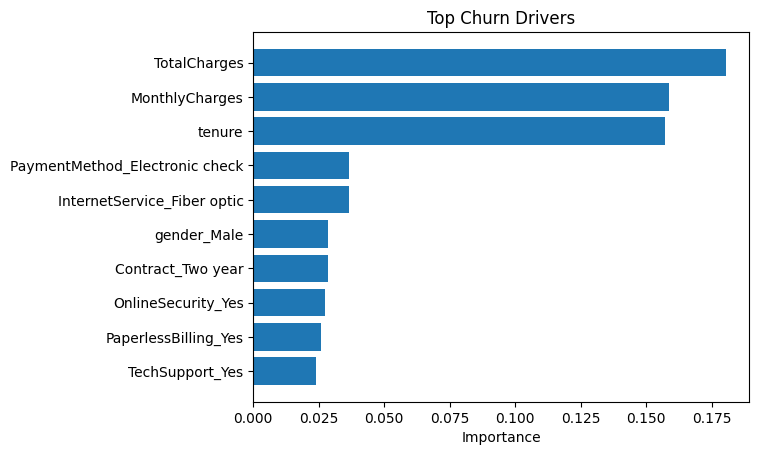

In [27]:
top_features = feature_importance.head(10)
plt.figure()
plt.barh(top_features["feature"], top_features["importance"])
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Top Churn Drivers")
plt.show()

In [28]:
scoring_df = X_test.copy()
scoring_df["churn_probability"] = rf_probs
scoring_df["actual_churn"] = y_test.values

scoring_df["risk_segment"] = pd.cut(
    scoring_df["churn_probability"],
    bins=[0, 0.33, 0.66, 1.0],
    labels=["Low", "Medium", "High"]
)

scoring_df["risk_segment"].value_counts()

,count
risk_segment,
Low,996
Medium,411
High,207


In [29]:
scoring_df.groupby("risk_segment")["actual_churn"].mean()

/tmp/ipython-input-4281297109.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  scoring_df.groupby("risk_segment")["actual_churn"].mean()


,actual_churn
risk_segment,
Low,0.134538
Medium,0.459854
High,0.690821


In [31]:
export_df = scoring_df.copy()
export_df.to_csv("churn_scoring_for_powerbi.csv", index=False)